In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


df = sns.load_dataset("penguins")
df.dropna(inplace=True)
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

 # Initialize the LabelEncoder
le = LabelEncoder()
 # Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

print(df_filtered[['species', 'class_encoded']])

y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [24]:
# Drop the redundant column
X = df_filtered.drop( ['species'], axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

logreg = LogisticRegression(solver='saga',max_iter=10000)
logreg.fit(X_train, y_train)
 # Predict on the testing data
y_pred = logreg.predict(X_test)
 # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.46423748 -0.15179911  0.31352712 -0.16854799  2.41786753  0.63681985
  -0.30542418 -0.36858293]] [-2.23865157]


In [9]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Accuracy: 1.0
Coefficients: [[ 1.43706602 -0.10780626  0.27650451 -0.16723515  2.46636676  0.44770696
  -0.18280599 -0.32700702]]
Intercept: [-1.49806467]


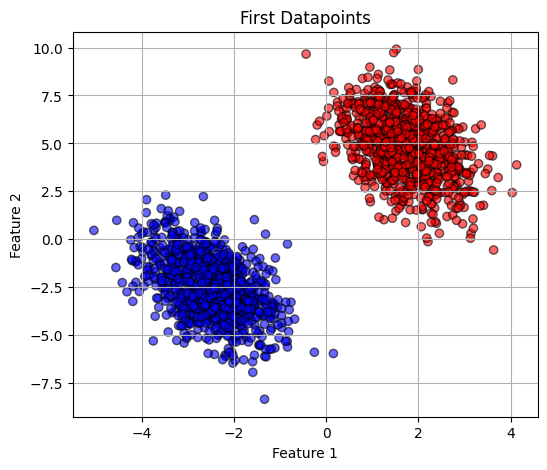

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.6, edgecolor="k")
plt.title("First Datapoints")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights
np.random.seed(42)
W = np.zeros(X.shape[1])  # use 2 weights due to x having 2 features
b = 0.0

alpha = 0.01   # learning rate
iterations = 20
m = X.shape[0]

losses_gd = []


for i in range(iterations):
    z = np.dot(X, W) + b
    y_hat = sigmoid(z)

    # Compute loss (not needed for update, but for visualizing)
    loss = -(1/m) * np.sum(y*np.log(y_hat + 1e-8) + (1-y)*np.log(1-y_hat + 1e-8))

    # COmputing gradients
    dW = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    # Updating the weights
    W -= alpha * dW
    b -= alpha * db
    losses_gd.append(loss)

    print(f"Iteration {i+1}: Loss = {loss:.4f}")

print(losses_gd)

Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.6499
Iteration 3: Loss = 0.6109
Iteration 4: Loss = 0.5756
Iteration 5: Loss = 0.5437
Iteration 6: Loss = 0.5148
Iteration 7: Loss = 0.4885
Iteration 8: Loss = 0.4646
Iteration 9: Loss = 0.4428
Iteration 10: Loss = 0.4228
Iteration 11: Loss = 0.4045
Iteration 12: Loss = 0.3877
Iteration 13: Loss = 0.3721
Iteration 14: Loss = 0.3578
Iteration 15: Loss = 0.3445
Iteration 16: Loss = 0.3321
Iteration 17: Loss = 0.3207
Iteration 18: Loss = 0.3100
Iteration 19: Loss = 0.3000
Iteration 20: Loss = 0.2906
[np.float64(0.6931471605599454), np.float64(0.6499124669032527), np.float64(0.610883485777322), np.float64(0.5756196651602734), np.float64(0.5437130996412746), np.float64(0.5147922391078252), np.float64(0.48852282080420867), np.float64(0.4646068857581193), np.float64(0.4427805961335009), np.float64(0.42281139913724564), np.float64(0.40449492374791773), np.float64(0.387651865534507), np.float64(0.3721250157324647), np.float64(0.3577765203604535),

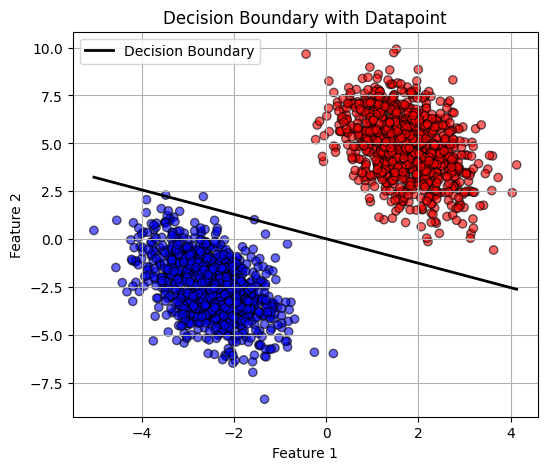

In [4]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.6, edgecolor="k")

# Decision boundary line: W1*x1 + W2*x2 + b = 0
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
y_values = -(W[0]*x_values + b) / (W[1] + 1e-8)  # avoid divide by zero
plt.plot(x_values, y_values, color="black", linewidth=2, label="Decision Boundary")

plt.title("Decision Boundary with Datapoint")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Add bias column to X so bias is included in W
X_bias = np.c_[np.ones((X.shape[0], 1)), X]   # shape: (m, 3)
m, n = X_bias.shape  

# Initialize weights (zeros for Newton’s method)
W_newton = np.zeros(n)

iterations = 20

loss_newton = []

for i in range(iterations):
    
    z = np.dot(X_bias, W_newton)
    y_hat = sigmoid(z)

    # Commputing Gradient
    grad = np.dot(X_bias.T, (y_hat - y))

    # COmputing Hessian
    R = np.diag(y_hat * (1 - y_hat))
    H = np.dot(X_bias.T, np.dot(R, X_bias))

    # Newton update
    H_inv = np.linalg.inv(H)
    W_newton -= np.dot(H_inv, grad)

    # Loss (optional, for tracking)
    loss = -(1/m) * np.sum(y*np.log(y_hat + 1e-8) + (1-y)*np.log(1-y_hat + 1e-8))
    
    loss_newton.append(loss)

    print(f"Iter {i+1}: Loss = {loss:.4f}")

Iter 1: Loss = 0.6931
Iter 2: Loss = 0.1452
Iter 3: Loss = 0.0528
Iter 4: Loss = 0.0203
Iter 5: Loss = 0.0080
Iter 6: Loss = 0.0032
Iter 7: Loss = 0.0013
Iter 8: Loss = 0.0005
Iter 9: Loss = 0.0002
Iter 10: Loss = 0.0001
Iter 11: Loss = 0.0000
Iter 12: Loss = 0.0000
Iter 13: Loss = 0.0000
Iter 14: Loss = 0.0000
Iter 15: Loss = 0.0000
Iter 16: Loss = 0.0000
Iter 17: Loss = 0.0000
Iter 18: Loss = 0.0000
Iter 19: Loss = 0.0000
Iter 20: Loss = -0.0000


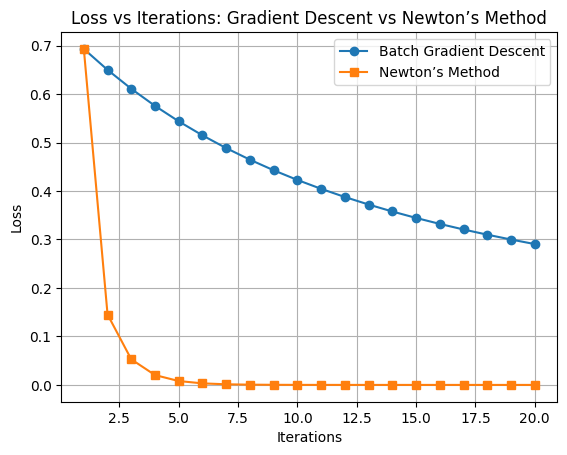

In [20]:
plt.plot(range(1, iterations+1), losses_gd, label="Batch Gradient Descent", marker="o")
plt.plot(range(1, iterations+1), loss_newton, label="Newton’s Method", marker="s")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations: Gradient Descent vs Newton’s Method")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply transformation (same as before)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights
np.random.seed(42)
W = np.zeros(X.shape[1])  # 2 features → 2 weights
b = 0.0

alpha = 0.01   # learning rate
iterations = 20
m = X.shape[0]

losses_gd_2 = []

# Batch Gradient Descent
for i in range(iterations):
    z = np.dot(X, W) + b
    y_hat = sigmoid(z)

    # Compute Binary Cross-Entropy loss
    loss = -(1/m) * np.sum(y*np.log(y_hat + 1e-8) + (1-y)*np.log(1-y_hat + 1e-8))

    # Gradients
    dW = (1/m) * np.dot(X.T, (y_hat - y))
    db = (1/m) * np.sum(y_hat - y)

    # Update weights
    W -= alpha * dW
    b -= alpha * db
    losses_gd_2.append(loss)
    print(f"Iteration {i+1}: Loss = {loss:.4f}")

print(losses_gd_2)
print(losses_gd)

Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.6909
Iteration 3: Loss = 0.6888
Iteration 4: Loss = 0.6867
Iteration 5: Loss = 0.6847
Iteration 6: Loss = 0.6827
Iteration 7: Loss = 0.6809
Iteration 8: Loss = 0.6790
Iteration 9: Loss = 0.6772
Iteration 10: Loss = 0.6755
Iteration 11: Loss = 0.6738
Iteration 12: Loss = 0.6721
Iteration 13: Loss = 0.6705
Iteration 14: Loss = 0.6689
Iteration 15: Loss = 0.6673
Iteration 16: Loss = 0.6658
Iteration 17: Loss = 0.6642
Iteration 18: Loss = 0.6627
Iteration 19: Loss = 0.6612
Iteration 20: Loss = 0.6598
[np.float64(0.6931471605599454), np.float64(0.690908645878691), np.float64(0.6887573971933909), np.float64(0.686684461710783), np.float64(0.6846819039747954), np.float64(0.6827426915915108), np.float64(0.6808605931773584), np.float64(0.6790300873870817), np.float64(0.6772462819416614), np.float64(0.675504841649087), np.float64(0.673801924487922), np.float64(0.6721341249014987), np.float64(0.670498423526969), np.float64(0.6688921426566591), np.fl

C:\Users\jsayu\AppData\Local\Temp\ipykernel_9640\203287275.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


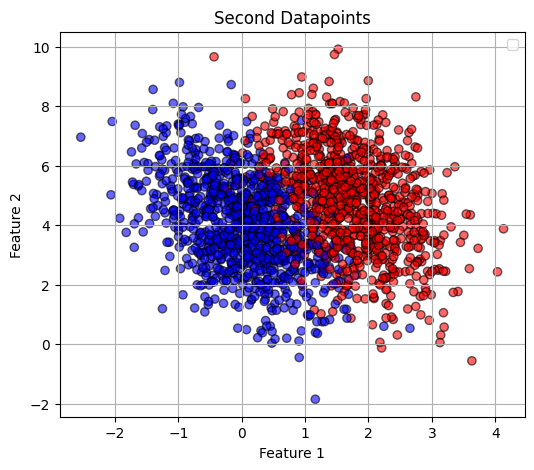

In [16]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", alpha=0.6, edgecolor="k")



plt.title("Second Datapoints")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

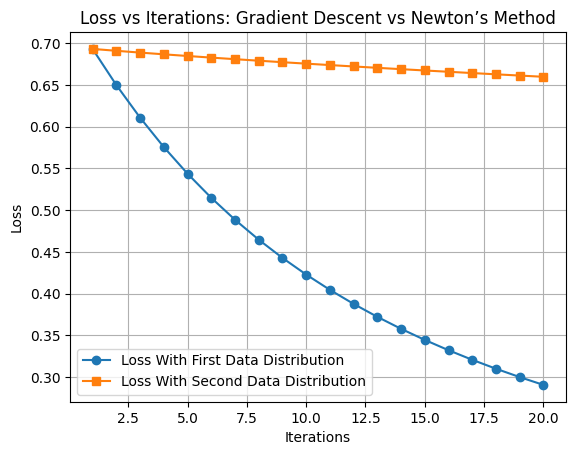

In [29]:
plt.plot(range(1, iterations+1), losses_gd, label="Loss With First Data Distribution", marker="o")
plt.plot(range(1, iterations+1), losses_gd_2, label="Loss With Second Data Distribution", marker="s")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations: Gradient Descent vs Newton’s Method")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
print(losses_gd)

[np.float64(0.6931471605599454), np.float64(0.690908645878691), np.float64(0.6887573971933909), np.float64(0.686684461710783), np.float64(0.6846819039747954), np.float64(0.6827426915915108), np.float64(0.6808605931773584), np.float64(0.6790300873870817), np.float64(0.6772462819416614), np.float64(0.675504841649087), np.float64(0.673801924487922), np.float64(0.6721341249014987), np.float64(0.670498423526969), np.float64(0.6688921426566591), np.float64(0.6673129067982643), np.float64(0.6657586077647409), np.float64(0.6642273737840911), np.float64(0.6627175421735124), np.float64(0.6612276351717332), np.float64(0.6597563385679941)]
